In [10]:
import rebound
import reboundx
from scipy.integrate import odeint
from ctypes import c_double
import numpy as np

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-3, a=1., e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 5.e-2
sim.force_is_velocity_dependent = 1

In [11]:
sixdoub = c_double*6
rebx = reboundx.Extras(sim)
params = rebx.add("modify_orbits_direct")
C2 = 1.e6
params.params["c"] = np.sqrt(C2)

In [12]:
def diffeq(y, t, C2, sim):
    ps = sim.particles
    ps[0].x, ps[0].y, ps[0].z, ps[0].vx, ps[0].vy, ps[0].vz, ps[1].x, ps[1].y, ps[1].z, ps[1].vx, ps[1].vy, ps[1].vz = y
    a = sixdoub()
    rebx.gr_acc(a, C2)
    #dydt = [ps[0].vx, ps[0].vy, ps[0].vz, a[0], a[1], a[2], ps[1].vx, ps[1].vy, ps[1].vz, a[3], a[4], a[5]] 
    #print(t, a[3])
    dydt = [0, 0, 0, a[0], a[1], a[2], 0, 0, 0, a[3], a[4], a[5]] 
    return dydt
def op(reb_sim, dt):
    sim = reb_sim.contents
    ps = sim.particles
    y0 = [ps[0].x, ps[0].y, ps[0].z, ps[0].vx, ps[0].vy, ps[0].vz, ps[1].x, ps[1].y, ps[1].z, ps[1].vx, ps[1].vy, ps[1].vz]
    sol = odeint(diffeq, y0, [0.,dt], args=(C2, sim), h0=1.e-4)
    ps[0].x, ps[0].y, ps[0].z, ps[0].vx, ps[0].vy, ps[0].vz, ps[1].x, ps[1].y, ps[1].z, ps[1].vx, ps[1].vy, ps[1].vz = sol[-1]

In [13]:
sim.ri_whfast.symplectic_operator = op

In [14]:
%%time
Nout = 1000
tmax = 1.e5
times = np.logspace(0,np.log10(tmax),Nout)
Eerr = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, params)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, params)
    Eerr[i] = abs((E-E0)/E0)

CPU times: user 22min 4s, sys: 1.98 s, total: 22min 6s
Wall time: 22min 7s


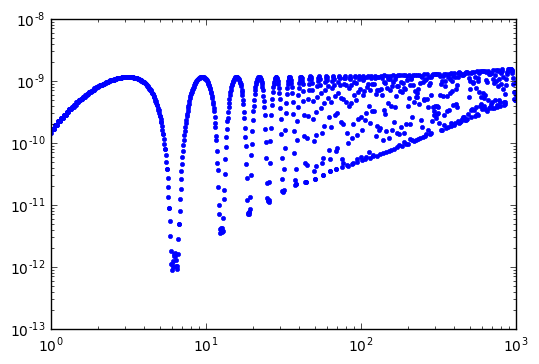

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerr, '.')
ax.set_xscale('log')
ax.set_yscale('log')

In [15]:
import rebound
import reboundx
import numpy as np

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-3, a=1., e=0.1)
sim.move_to_com()
sim.integrator="whfast"
sim.dt = 5.e-2
rebx = reboundx.Extras(sim)
params = rebx.add("gr")
C2 = 1.e6
params.params["c"] = np.sqrt(C2)

-0.0004999967886380259
CPU times: user 3.08 s, sys: 1.65 s, total: 4.73 s
Wall time: 7.15 s


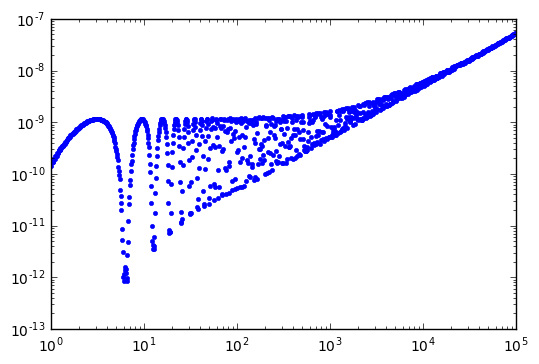

In [16]:
%%time
times = np.logspace(0,np.log10(tmax),Nout)
EerrGR = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, params)
print(E0)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, params)
    EerrGR[i] = abs((E-E0)/E0)
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, EerrGR, '.')
ax.set_xscale('log')
ax.set_yscale('log')

In [39]:
sim.particles[1].pomega

4.187582370663542e-05

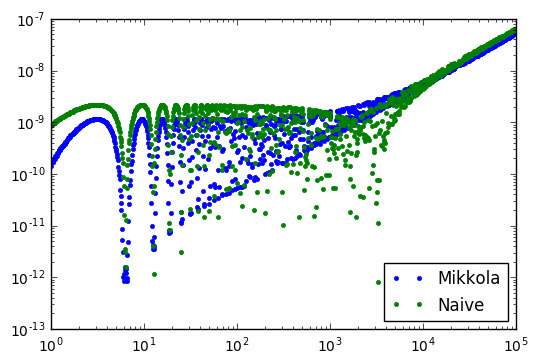

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, Eerr, '.', label='Mikkola')
ax.plot(times, EerrGR, '.', label='Naive')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='lower right')

CPU times: user 11.4 s, sys: 9.56 ms, total: 11.4 s
Wall time: 11.4 s


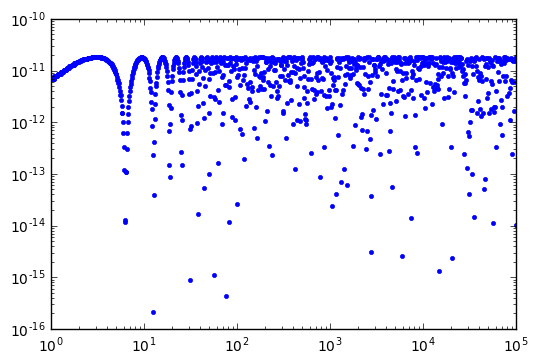

In [7]:
%%time
import rebound
import reboundx
import numpy as np

sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-3, a=1., e=0.1)
sim.move_to_com()
sim.integrator="ias15"
#sim.dt = 5.e-2
rebx = reboundx.Extras(sim)
params = rebx.add("gr")
C2 = 1.e6
params.params["c"] = np.sqrt(C2)

times = np.logspace(0,np.log10(tmax),Nout)
EerrIAS15 = np.zeros(Nout)
E0 = rebx.gr_hamiltonian(sim, params)
for i, time in enumerate(times):
    sim.integrate(time, exact_finish_time=0)
    E = rebx.gr_hamiltonian(sim, params)
    EerrIAS15[i] = abs((E-E0)/E0)
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, EerrIAS15, '.')
ax.set_xscale('log')
ax.set_yscale('log')

In [2]:
Nout = 1000
tmax = 1.e5

In [6]:
sim.particles[1].pomega

0.3026473259581008